<a href="https://colab.research.google.com/github/raneymjohnGit/Austin_TX_House_Listings/blob/jayanbranch/Jayan/Analysis/Machine_Learning_Models_with_Cleaned_Data%2C_Feature_Selection%2C_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites to connect to Heroku SQL Database

In [1]:
# Copy paste this code
# Install psycopg2-binary
! pip install psycopg2-binary 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Copy paste this code
# URL for Heroku DB
raw_db_url='dpaclsxjrpfluk:4fa14e6fdb846bd14d1a9eda261d554fab9688f2f4dd5483bc38d94cdee010ad@ec2-3-219-52-220.compute-1.amazonaws.com:5432/d7s0s0hs0a5lar'

In [3]:
 # Copy paste this code
 # Import SQL Alchemy, format url string for SQLAlchemy
 
import subprocess
from sqlalchemy.engine.create import create_engine

# Convert binary string to a regular string & remove the newline character
db_url = raw_db_url

# Convert "postgres://<db_address>"  --> "postgresql+psycopg2://<db_address>" needed for SQLAlchemy
final_db_url = "postgresql+psycopg2://" + db_url.lstrip("postgres://")  # lstrip() is more suitable here than replace() function since we only want to replace postgres at the start!


# Create SQLAlchemy engine
# ------------------------
engine = create_engine(final_db_url)

# Read in cleaned data from SQL as DataFrame

In [4]:
# SQL to dataframe using sqlalchemy
import pandas as pd

df = pd.read_sql_table('cleaned_data_1', engine)
df.head()

,index,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,month_year,latest_saledate_dt,dec_2019_price,jan_2021_price,price_per_sqft
0,6702,29415933,austin,5804 Bullard Dr,78757,"5804 Bullard Dr, Austin, TX 78757 is a single ...",30.336634,-97.750031,1.98,3,...,1153,16,2.0,3,1,2019-06,2019-06-21,470317,547114,202
1,4729,58304707,austin,823 Walnut Creek Dr,78753,"823 Walnut Creek Dr, Austin, TX 78753 is a sin...",30.386883,-97.668449,1.98,3,...,814,15,2.0,3,1,2019-02,2019-02-27,418299,486603,211
2,7501,29482307,austin,4410 Garnett St,78745,Complete remodel of a gorgeous vintage home. O...,30.218693,-97.770554,1.98,3,...,792,13,2.0,4,1,2019-07,2019-07-02,598560,696298,343
3,5146,29513449,austin,11412 Gun Fight Ln,78748,Large move-in ready Shady Hollow home loaded w...,30.162312,-97.854210,1.98,3,...,1633,17,4.0,5,2,2019-03,2019-03-20,481300,559890,137
4,5256,29479870,austin,1311 Casey St,78745,"1311 Casey St, Austin, TX 78745 is a single fa...",30.225712,-97.781837,1.98,3,...,803,12,2.0,3,1,2019-03,2019-03-11,374344,435470,300


In [5]:
# check datatypes
df.dtypes

index                                  int64
zpid                                   int64
city                                  object
streetAddress                         object
zipcode                                int64
description                           object
latitude                             float64
longitude                            float64
propertyTaxRate                      float64
garageSpaces                           int64
hasAssociation                          bool
hasCooling                              bool
hasGarage                               bool
hasHeating                              bool
hasSpa                                  bool
hasView                                 bool
homeType                              object
parkingSpaces                          int64
yearBuilt                              int64
latestprice                          float64
latest_saledate                       object
latest_salemonth                       int64
latest_sal

In [6]:
# Drop non-numeric columns that will not be used for models, erroneus columns like index and jan_2021_price, and columns that are calculated from variables like price_per_sqft

df = df.drop(columns=['zpid', 'index', 'city', 'streetAddress', 'description', 'latest_saledate', 'latest_salemonth', 'latest_saleyear', 'month_year', 'latest_saledate_dt', 'jan_2021_price', 'price_per_sqft', 'homeType', 'latestprice'])


In [7]:
# Double check dtypes before moving forward

df.dtypes

zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
parkingSpaces                   int64
yearBuilt                       int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSch

In [8]:
# Import machine learning, visualization dependencies

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (40, 20) # plot size

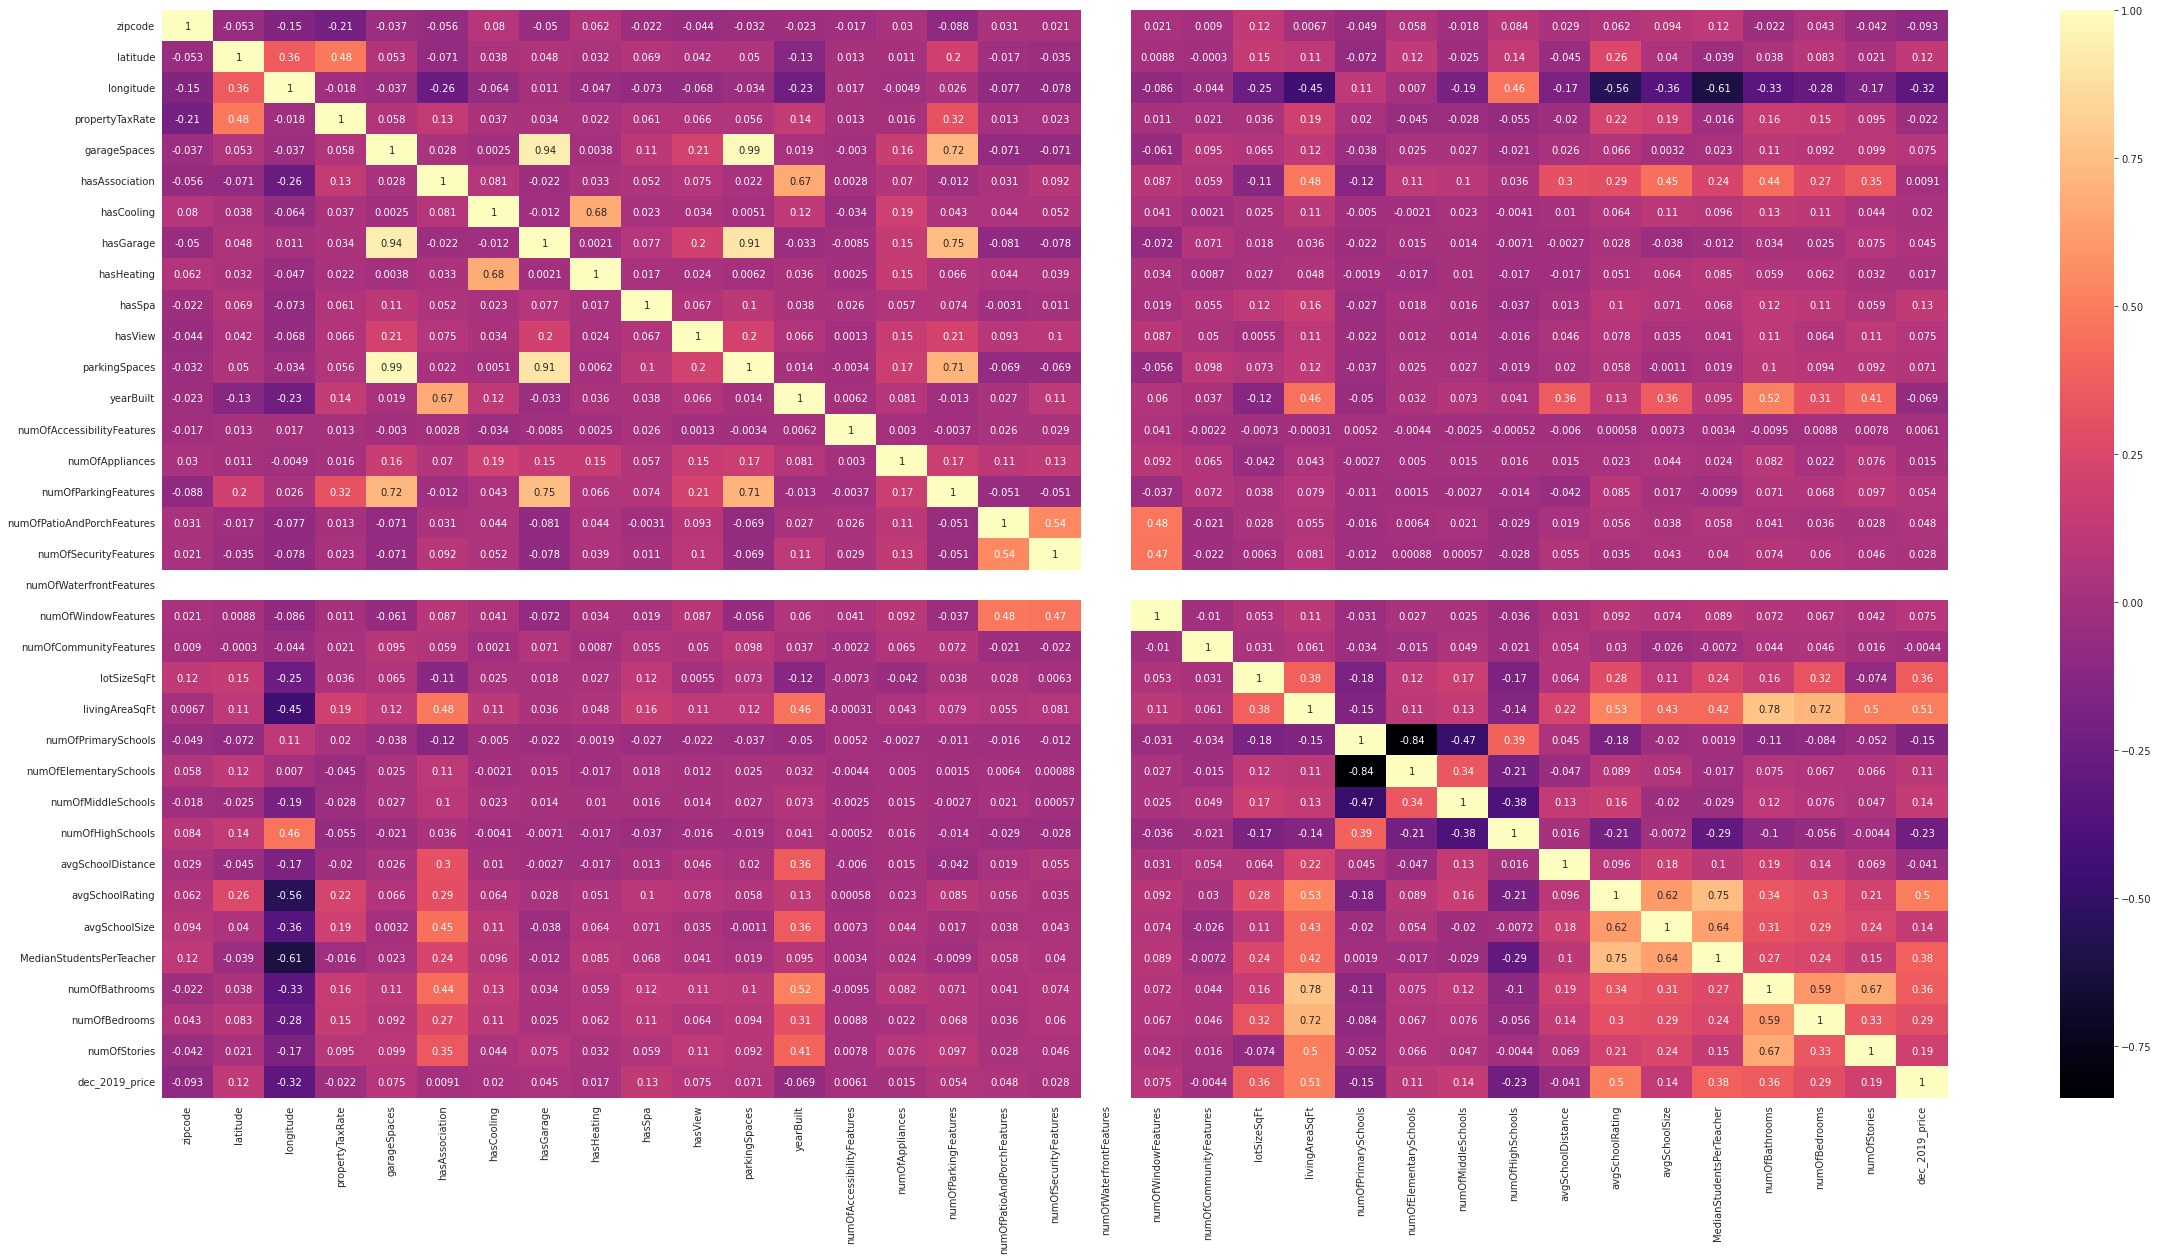

In [9]:
# Plot seaborn heatmap to see features that correlate
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.rcParams['figure.figsize'] = (40, 20) # plot size
plt.show()

In [10]:
# Get correlations, put in dataframe, sort to see highest correlated variables. 
corr = df[df.columns[1:]].corr()['dec_2019_price'][:].to_frame('correlation to price')
corr = corr.sort_values('correlation to price', ascending=False)
corr

# highly correlated variables can be seen below. 

,correlation to price
dec_2019_price,1.000000
livingAreaSqFt,0.507111
avgSchoolRating,0.499568
MedianStudentsPerTeacher,0.384532
numOfBathrooms,0.363155
lotSizeSqFt,0.362775
numOfBedrooms,0.289513
numOfStories,0.194625
numOfMiddleSchools,0.141062
avgSchoolSize,0.135706


In [11]:
# Cast zipcode as string for hot encoding

df['zipcode'] = df['zipcode'].astype(str)
print(cl(df.dtypes, attrs = ['bold']))

zipcode                        object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
parkingSpaces                   int64
yearBuilt                       int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSch

In [12]:
# Make copy of dataframe before encoding
df_encode_1 = df.copy(deep=True)

In [13]:
# Hot Encode Zip Code

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df_encode_1[['zipcode']])
df_encode_1[one_hot.categories_[0]] = encoded.toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,


In [14]:
# Change dataframe settings to be able to see all columns
pd.set_option('display.max_columns', None)

# drop zipcode string column, check dataframe for hot encoding
df_encode_1 = df_encode_1.drop(columns='zipcode')
df_encode_1.head()

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,parkingSpaces,yearBuilt,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,dec_2019_price,78617,78660,78702,78703,78704,78705,78717,78721,78722,78723,78724,78725,78726,78727,78728,78729,78730,78731,78732,78733,78735,78736,78737,78739,78741,78744,78745,78746,78747,78748,78749,78750,78751,78752,78753,78754,78756,78757,78758,78759
0,30.336634,-97.750031,1.98,3,False,True,True,True,False,True,5,1958,0,8,4,0,0,0,0,0,10018.0,2226.0,1,0,1,1,0.800000,6.666667,1153,16,2.0,3,1,470317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,30.386883,-97.668449,1.98,3,False,True,True,True,False,False,5,1961,0,8,6,0,0,0,0,0,10018.0,1706.0,1,0,1,1,2.400000,5.000000,814,15,2.0,3,1,418299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30.218693,-97.770554,1.98,3,False,True,True,True,False,True,5,1941,0,8,5,0,0,0,0,0,15246.0,1676.0,1,0,1,1,1.366667,3.333333,792,13,2.0,4,1,598560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.162312,-97.854210,1.98,3,True,True,True,True,False,True,5,1988,0,3,4,0,0,0,0,0,7361.0,3279.0,1,0,1,1,1.100000,7.333333,1633,17,4.0,5,2,481300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.225712,-97.781837,1.98,3,False,True,True,True,False,False,5,1958,0,4,4,0,0,0,0,0,9931.0,1168.0,1,0,1,1,1.733333,4.000000,803,12,2.0,3,1,374344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Split into training and testing datasets to train the models.

X_var_df = df_encode_1.drop(columns='dec_2019_price')

X_var = X_var_df.values
y_var = df_encode_1['dec_2019_price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 42)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[30.34920883178711 -97.61170959472656 1.98 2 True True True True False
  False 2 2001 0 4 2 0 0 0 0 1 15245.999999999998 4051.0 1 0 1 2 2.0 5.0
  1049 11 4.0 6 2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]
 [30.332237243652344 -97.75618743896484 1.98 2 False True True True False
  False 2 1950 0 5 2 0 0 0 0 0 8712.0 1453.0 1 0 1 1 1.0 7.0 1177 16 2.0
  3 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0]
 [30.211933135986328 -97.84069061279295 1.98 0 False True False True
  False False 0 1981 0 2 1 0 0 0 0 0 6728.0 1300.0 1 0 1 1 1.2
  4.666666666666667 887 14 2.0 5 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [3

In [16]:
# Train the various linear models. 

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e+12, tolerance: 1.623e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [17]:
# Print the regression metric - Explained Variance Score.

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.6821904459714747
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.6813054213586335
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.6821901418641165
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.6807564102234602
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.6623922355928819
-------------------------------------------------------------------------------


# Trying Random Forest Regressor

In [18]:
# Splitting the data and creating a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X = X_var_df
y = df_encode_1['dec_2019_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [19]:
clf = RandomForestRegressor(n_estimators=300)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7436715463725253

In [20]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [21]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

11

In [22]:
print(selected_feat)

Index(['latitude', 'longitude', 'yearBuilt', 'numOfAppliances', 'lotSizeSqFt',
       'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', '78702', '78704'],
      dtype='object')


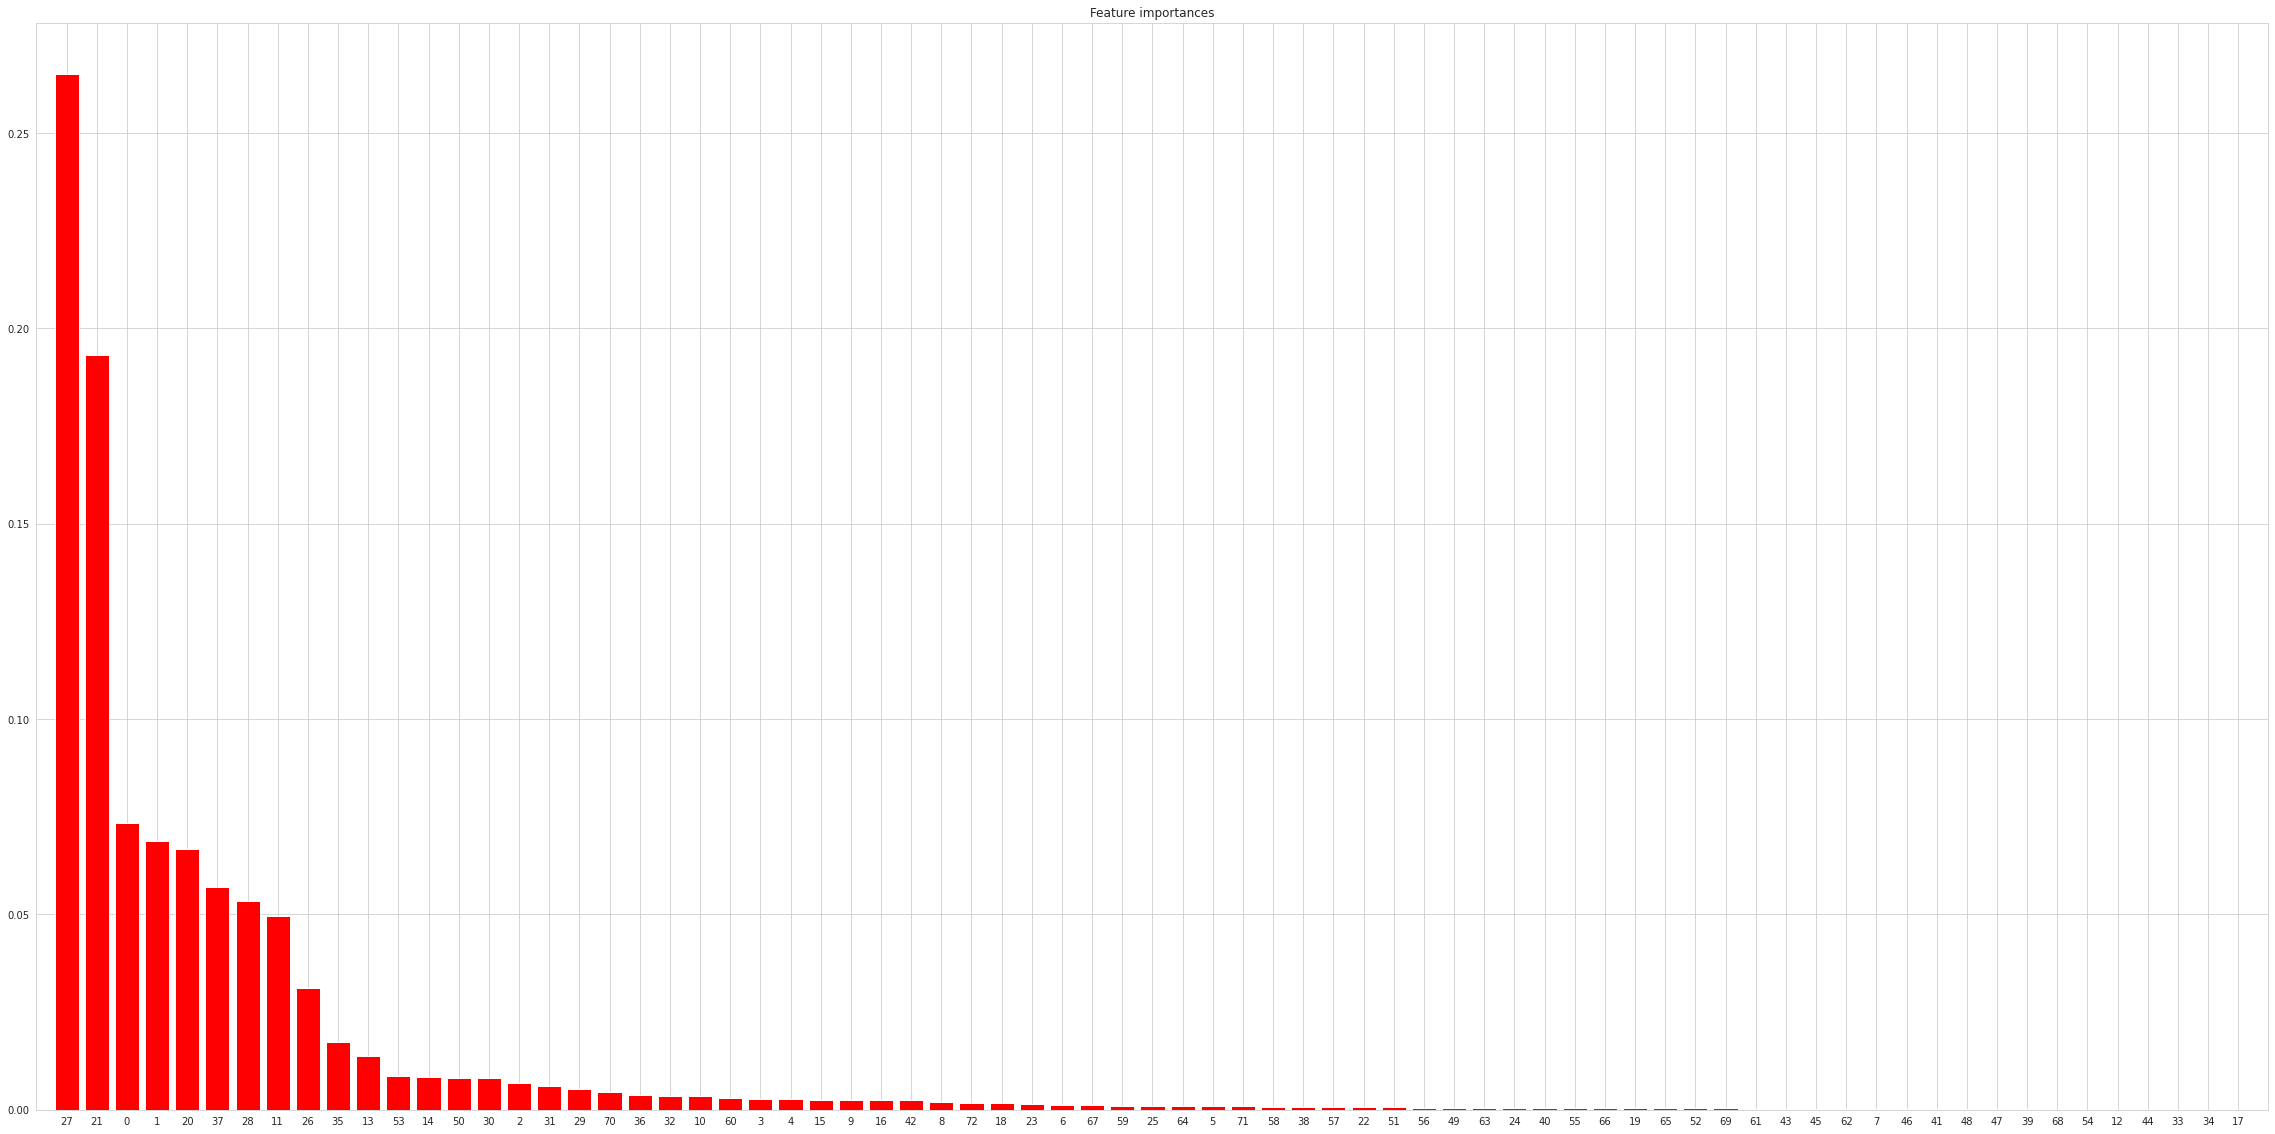

In [23]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.rcParams["figure.figsize"] = (60,20)
plt.show()

In [24]:
list(enumerate(X.columns))

[(0, 'latitude'),
 (1, 'longitude'),
 (2, 'propertyTaxRate'),
 (3, 'garageSpaces'),
 (4, 'hasAssociation'),
 (5, 'hasCooling'),
 (6, 'hasGarage'),
 (7, 'hasHeating'),
 (8, 'hasSpa'),
 (9, 'hasView'),
 (10, 'parkingSpaces'),
 (11, 'yearBuilt'),
 (12, 'numOfAccessibilityFeatures'),
 (13, 'numOfAppliances'),
 (14, 'numOfParkingFeatures'),
 (15, 'numOfPatioAndPorchFeatures'),
 (16, 'numOfSecurityFeatures'),
 (17, 'numOfWaterfrontFeatures'),
 (18, 'numOfWindowFeatures'),
 (19, 'numOfCommunityFeatures'),
 (20, 'lotSizeSqFt'),
 (21, 'livingAreaSqFt'),
 (22, 'numOfPrimarySchools'),
 (23, 'numOfElementarySchools'),
 (24, 'numOfMiddleSchools'),
 (25, 'numOfHighSchools'),
 (26, 'avgSchoolDistance'),
 (27, 'avgSchoolRating'),
 (28, 'avgSchoolSize'),
 (29, 'MedianStudentsPerTeacher'),
 (30, 'numOfBathrooms'),
 (31, 'numOfBedrooms'),
 (32, 'numOfStories'),
 (33, '78617'),
 (34, '78660'),
 (35, '78702'),
 (36, '78703'),
 (37, '78704'),
 (38, '78705'),
 (39, '78717'),
 (40, '78721'),
 (41, '78722'),
 

# Try reducing the number of features via feature selection

In [26]:
df_encode_2 = df.copy(deep=True)

In [27]:
df_encode_2 = df_encode_2[['latitude', 'longitude', 'yearBuilt', 'lotSizeSqFt', 'livingAreaSqFt',
       'avgSchoolDistance', 'avgSchoolRating', 'avgSchoolSize', 'zipcode', 'dec_2019_price']]

In [28]:
# Hot Encode Zip Code

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df_encode_2[['zipcode']])
df_encode_2[one_hot.categories_[0]] = encoded.toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,


In [29]:
df_encode_2.head()

,latitude,longitude,yearBuilt,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,zipcode,dec_2019_price,78617,78660,78702,78703,78704,78705,78717,78721,78722,78723,78724,78725,78726,78727,78728,78729,78730,78731,78732,78733,78735,78736,78737,78739,78741,78744,78745,78746,78747,78748,78749,78750,78751,78752,78753,78754,78756,78757,78758,78759
0,30.336634,-97.750031,1958,10018.0,2226.0,0.800000,6.666667,1153,78757,470317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,30.386883,-97.668449,1961,10018.0,1706.0,2.400000,5.000000,814,78753,418299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30.218693,-97.770554,1941,15246.0,1676.0,1.366667,3.333333,792,78745,598560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.162312,-97.854210,1988,7361.0,3279.0,1.100000,7.333333,1633,78748,481300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.225712,-97.781837,1958,9931.0,1168.0,1.733333,4.000000,803,78745,374344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Splitting the data and creating a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X_var_df = df_encode_2.drop(columns='dec_2019_price')

X = X_var_df
y = df_encode_2['dec_2019_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
clf = RandomForestRegressor(n_estimators=300)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7400074817624761